## **Importing Packages**

In [52]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
from glob import glob
import cv2
import random

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline

In [53]:
from google.colab import drive
# drive.mount('/content/drive')

In [54]:
from keras.models import Sequential
from keras import layers, optimizers
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.vgg16 import VGG16

import matplotlib.pyplot as plt
from PIL import Image 
from glob import glob
import tensorflow as tf

In [55]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [56]:
from keras.models import Sequential, load_model, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical

In [57]:
print(tf.test.gpu_device_name())
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
!cat /proc/meminfo

/device:GPU:0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13886757927114088906
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14674281152
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1610792776246283151
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]
MemTotal:       13305332 kB
MemFree:         3248932 kB
MemAvailable:   10644568 kB
Buffers:          127984 kB
Cached:          5754300 kB
SwapCached:            0 kB
Active:          2792500 kB
Inactive:        6806948 kB
Active(anon):    2055392 kB
Inactive(anon):    14776 kB
Active(file):     737108 kB
Inactive(file):  6792172 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              1048 kB
Writeback:            48 kB
AnonPages:       3717052 kB
Mapped:          1504976 kB
Shmem:             15572 kB
KReclaimable:     192300 kB
Slab:        

In [58]:
from google.colab import drive

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
%cd drive/MyDrive/Transfer\ Learning\ Project

[Errno 2] No such file or directory: 'drive/MyDrive/Transfer Learning Project'
/content/drive/MyDrive/Transfer Learning Project


## **Randomly shuffle training dataset and make a dataframe storing filename and category**

In [61]:
fname = os.listdir('./train_samp')
random.shuffle(fname)
print(fname)

['dog.12202.jpg', 'dog.3473.jpg', 'dog.12027.jpg', 'cat.166.jpg', 'cat.344.jpg', 'cat.731.jpg', 'cat.425.jpg', 'cat.709.jpg', 'dog.3835.jpg', 'cat.1198.jpg', 'cat.1455.jpg', 'dog.3324.jpg', 'dog.12342.jpg', 'dog.11906.jpg', 'cat.836.jpg', 'dog.3607.jpg', 'dog.11854.jpg', 'dog.3635.jpg', 'dog.3909.jpg', 'cat.900.jpg', 'dog.11843.jpg', 'dog.3742.jpg', 'dog.12406.jpg', 'dog.12492.jpg', 'cat.1450.jpg', 'cat.325.jpg', 'dog.3799.jpg', 'cat.51.jpg', 'cat.744.jpg', 'dog.3224.jpg', 'cat.727.jpg', 'dog.3161.jpg', 'cat.1237.jpg', 'dog.3796.jpg', 'cat.420.jpg', 'dog.3197.jpg', 'cat.1374.jpg', 'cat.412.jpg', 'dog.3090.jpg', 'cat.581.jpg', 'dog.12184.jpg', 'dog.3407.jpg', 'cat.1081.jpg', 'dog.12204.jpg', 'dog.3768.jpg', 'dog.12397.jpg', 'dog.12293.jpg', 'dog.3578.jpg', 'dog.12101.jpg', 'dog.3800.jpg', 'dog.12403.jpg', 'cat.69.jpg', 'cat.1023.jpg', 'dog.11828.jpg', 'dog.3726.jpg', 'cat.575.jpg', 'cat.1351.jpg', 'dog.11951.jpg', 'cat.143.jpg', 'dog.12398.jpg', 'cat.288.jpg', 'dog.12086.jpg', 'cat.521.

In [62]:
label = []
for f in fname:
    category = f.split('.')
    if category[2] != 'jpg':
      print(category[2])
    if category[0] == "cat":
        label.append(0)
    else:
        label.append(1)

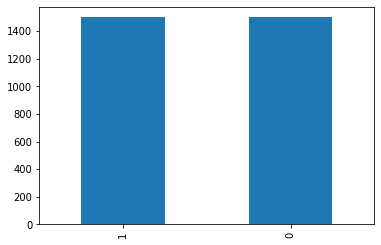

In [63]:
df = pd.DataFrame({ 'filename': fname, 'label': label })
df['label'].value_counts().plot.bar()

In [64]:
print(df.shape)

(3002, 2)


## **Split train and validation set**

In [65]:
train_df, val_df = train_test_split(df, test_size=0.2)
train_df = train_df.reset_index()
val_df = val_df.reset_index()

In [66]:
train_df = train_df.drop(['index'], axis = 1)
val_df = val_df.drop(['index'], axis = 1)
print(train_df.shape, val_df.shape)

(2401, 2) (601, 2)


Need to convert label to string type because of error generated during flow_from_directory method

**TypeError: If class_mode="binary", y_col="label" column values must be strings.**

In [67]:
train_df['label'] = train_df['label'].astype('str')
val_df['label'] = val_df['label'].astype('str')

print(train_df.head())
print(val_df.head())
print(train_df.info(), val_df.info())

       filename label
0   cat.368.jpg     0
1   cat.974.jpg     0
2  dog.3749.jpg     1
3  dog.3320.jpg     1
4   cat.807.jpg     0
        filename label
0    cat.632.jpg     0
1  dog.12386.jpg     1
2    cat.287.jpg     0
3   cat.1217.jpg     0
4   cat.1438.jpg     0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2401 non-null   object
 1   label     2401 non-null   object
dtypes: object(2)
memory usage: 37.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  601 non-null    object
 1   label     601 non-null    object
dtypes: object(2)
memory usage: 9.5+ KB
None None


## **Data Augmentation**

For training dataset alone, do augmentation. For validation and testing, just rescaling (normalizing) is enough

In [68]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=True,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.5,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.25,  # randomly shift images horizontally
        height_shift_range=0.25,  # randomly shift images vertically
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True, # randomly flip images
        rescale=1./255, # rescale between 0 and 1
)  

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


## **Training Generator**

Since images are stored as file and not as arrays, we need to extract using flow_from_dataframe method

In [69]:
train_generator = datagen.flow_from_dataframe(
                dataframe = train_df, # name of dataframe
                directory = "./train_samp/", # direcory where images are stored/
                x_col = "filename", # name of the file is stored in x_col
                y_col = "label", # label in y_col
                batch_size = 64, # size of batches of data
                seed = 5, # random no for shuffling and transformation
                shuffle = True, # whether to shuffle the data or not
                class_mode = "binary", # binary implies 2 classes are present
                target_size=(224, 224) # target size of images
) 

Found 2401 validated image filenames belonging to 2 classes.


## **Example transformation applied to training dataset**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


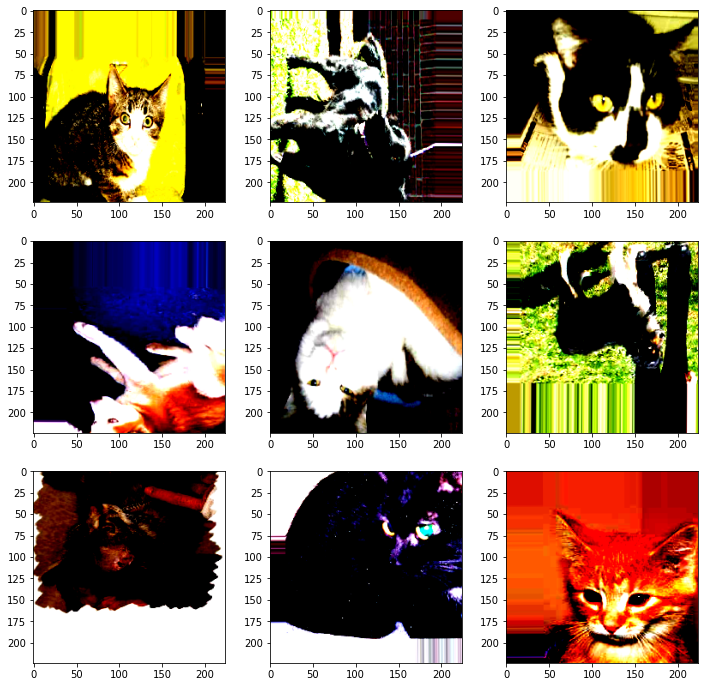

In [70]:
plt.figure(figsize=(12, 12))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    for X_img, Y_img in train_generator:
        image = X_img[0]
        plt.imshow(image)
        break
plt.show()

## **Validation Generator**

In [71]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
                dataframe = val_df, # name of dataframe
                directory = "./train_samp/", # direcory where images are stored
                x_col = "filename", # name of the file is stored in x_col
                y_col = "label", # label in y_col
                batch_size = 64, # size of batches of data
                class_mode = 'binary', # binary implies 2 classes are present
                target_size = (224, 224), # target size of images
)

Found 601 validated image filenames belonging to 2 classes.


## **Test Generator**

In [72]:
test_filenames = sorted(os.listdir("./test_samp"))
test_df = pd.DataFrame({ 'filename': test_filenames })
test_df
test_df.to_csv('results.csv')

In [73]:
test_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_gen.flow_from_dataframe(
              dataframe = test_df, # name of dataframe
              directory = "./test_samp", # direcory where images are stored
              x_col = "filename", # name of the file is stored in x_col
              y_col = None, # label in y_col
              # batch_size = 16, # size of batches of data
              class_mode = None, # binary implies 2 classes are present
              target_size = (256, 256), # target size of images
              # shuffle = False
)

Found 100 validated image filenames.


## **Building model - Basic VGG16 model without any fine tuning**

In [ ]:
from keras.applications import VGG16

input_shape = (image_size, image_size, 3)

pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
    
# for layer in pre_trained_model.layers[:15]:
#     layer.trainable = False

# for layer in pre_trained_model.layers[15:]:
#     layer.trainable = True
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
    
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

model.summary()

NameError: ignored

## **Training Basic VGG Model without any fine tuning**

**Learning Rate Scheduler**

In [ ]:
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [ ]:
early_stopping = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = model.fit_generator((train_generator), epochs=50, 
                              validation_data = (validation_generator), verbose=1, 
#                               batch_size = 100,
                              # steps_per_epoch = 5,
                              callbacks = [reduce_lr, early_stopping])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
19/19 [==============================] - 341s 17s/step - loss: 0.9188 - accuracy: 0.5402 - val_loss: 0.6525 - val_accuracy: 0.6090
Epoch 2/50
19/19 [==============================] - 45s 2s/step - loss: 0.5311 - accuracy: 0.7319 - val_loss: 0.7882 - val_accuracy: 0.5674
Epoch 3/50
19/19 [==============================] - 44s 2s/step - loss: 0.3204 - accuracy: 0.8628 - val_loss: 0.5546 - val_accuracy: 0.6905
Epoch 4/50
19/19 [==============================] - 44s 2s/step - loss: 0.2261 - accuracy: 0.9095 - val_loss: 0.5515 - val_accuracy: 0.6922
Epoch 5/50
19/19 [==============================] - 45s 2s/step - loss: 0.1754 - accuracy: 0.9292 - val_loss: 0.4253 - val_accuracy: 0.7770
Epoch 6/50
19/19 [==============================] - 44s 2s/step - loss: 0.1512 - accuracy: 0.9380 - val_loss: 0.4140 - val_accuracy: 0.7804
Epoch 7/50
19/19 [==============================] - 44s 2s/step - loss: 0.1345 - accuracy: 0.9419 - val_loss: 0.4880 - val_accuracy: 0.7354
Epoch 8/50
19/19 [

## **Plotting Graphs - Basic VGG Model**

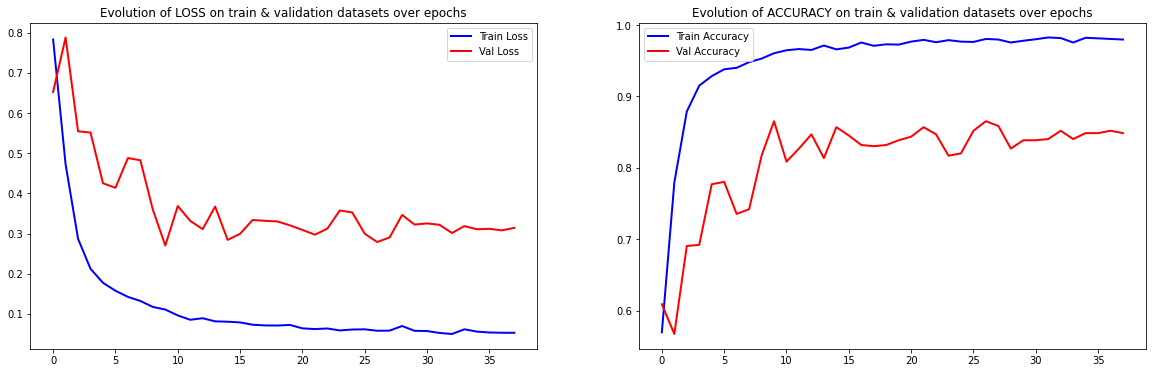

In [ ]:
# Check how loss & mae went down
epoch_loss = history.history['loss']
epoch_val_loss = history.history['val_loss']
epoch_acc = history.history['accuracy']
epoch_val_acc = history.history['val_accuracy']

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(range(0,len(epoch_loss)), epoch_loss, 'b-', linewidth=2, label='Train Loss')
plt.plot(range(0,len(epoch_val_loss)), epoch_val_loss, 'r-', linewidth=2, label='Val Loss')
plt.title('Evolution of LOSS on train & validation datasets over epochs')
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.plot(range(0,len(epoch_acc)), epoch_acc, 'b-', linewidth=2, label='Train Accuracy')
plt.plot(range(0,len(epoch_val_acc)), epoch_val_acc, 'r-', linewidth=2,label='Val Accuracy')
plt.title('Evolution of ACCURACY on train & validation datasets over epochs')
plt.legend(loc='best')

plt.show()

In [ ]:
loss, accuracy = model.evaluate_generator(validation_generator, workers=12)
print("Validation: accuracy = %f  ;  loss = %f " % (accuracy, loss))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Validation: accuracy = 0.848586  ;  loss = 0.314254 


In [ ]:
Y_val = val_df['label']
Y_val = np.asarray(Y_val)
y_pred =  model.predict_generator(validation_generator)
y_final = np.where(y_pred > 0.5, 1,0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


## **Predict test images**

In [ ]:
predict = model.predict_generator(test_generator)
threshold = 0.5
Y_test_pred = np.where(predict > 0.5, 1,0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
test_res = pd.read_csv('./results-test.csv')
Y_test_actual = test_res['label']
Y_test_actual = np.asarray(Y_test_actual)

## **Confusion Matrix and Classification report- Basic VGG16 Model**

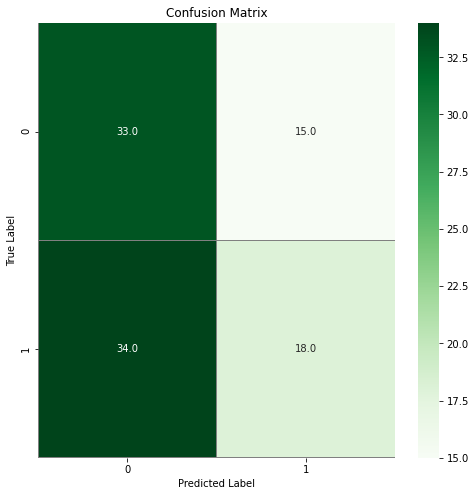

In [ ]:
# compute the confusion matrix
Y_test_actual = Y_test_actual.astype('str')
Y_test_pred = Y_test_pred.astype('str')
# y_final = y_final.reshape
# print(type(Y_val), type(y_final), Y_val.shape, y_final.shape, len(Y_val_list[100]), len(Y_final_list))
confusion_mtx = confusion_matrix(Y_test_actual, Y_test_pred) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
report = classification_report(Y_test_actual, Y_test_pred, target_names=['0','1'])
print(report)

              precision    recall  f1-score   support

           0       0.49      0.71      0.58        48
           1       0.55      0.33      0.41        52

    accuracy                           0.51       100
   macro avg       0.52      0.52      0.50       100
weighted avg       0.52      0.51      0.49       100



In [ ]:
sample_test = test_res.sample(n=9).reset_index()
sample_test.head()
plt.figure(figsize=(12, 12))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['label']
    img = load_img("./test_samp"+filename, target_size=(256, 256))
    plt.subplot(3, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')')
plt.tight_layout()
plt.show()

## **Building model - Basic VGG16 model with fine tuning**

In [74]:
from keras.applications import VGG16

image_size = 224
input_shape = (image_size, image_size, 3)

pre_trained_model2 = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
    
for layer in pre_trained_model2.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model2.layers[15:]:
    layer.trainable = True
    
for layer in pre_trained_model2.layers:
  print(layer.name, layer.trainable)


input_3 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [75]:
last_layer = pre_trained_model2.get_layer('block5_pool')
last_output = last_layer.output
    
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

VGG16model_finetuned = Model(pre_trained_model2.input, x)

VGG16model_finetuned.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

VGG16model_finetuned.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

## **Training Basic VGG Model with fine tuning**

In [76]:
early_stopping = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = VGG16model_finetuned.fit_generator((train_generator), epochs=25, 
                              validation_data = (validation_generator), verbose=1, 
                              callbacks = [early_stopping]
                              )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
38/38 [==============================] - 38s 980ms/step - loss: 0.7285 - accuracy: 0.6643 - val_loss: 0.6856 - val_accuracy: 0.6040
Epoch 2/25
38/38 [==============================] - 37s 980ms/step - loss: 0.2400 - accuracy: 0.8917 - val_loss: 0.6054 - val_accuracy: 0.6672
Epoch 3/25
38/38 [==============================] - 37s 974ms/step - loss: 0.1625 - accuracy: 0.9333 - val_loss: 0.5745 - val_accuracy: 0.6822
Epoch 4/25
38/38 [==============================] - 37s 970ms/step - loss: 0.1384 - accuracy: 0.9471 - val_loss: 0.4740 - val_accuracy: 0.7554
Epoch 5/25
38/38 [==============================] - 37s 970ms/step - loss: 0.0961 - accuracy: 0.9624 - val_loss: 0.4390 - val_accuracy: 0.7737
Epoch 6/25
38/38 [==============================] - 37s 967ms/step - loss: 0.0969 - accuracy: 0.9646 - val_loss: 0.4350 - val_accuracy: 0.7937
Epoch 7/25
38/38 [==============================] - 37s 972ms/step - loss: 0.0871 - accuracy: 0.9677 - val_loss: 0.4253 - val_accuracy: 0.7837

## **Plotting Graphs - Finetuned VGG Model**

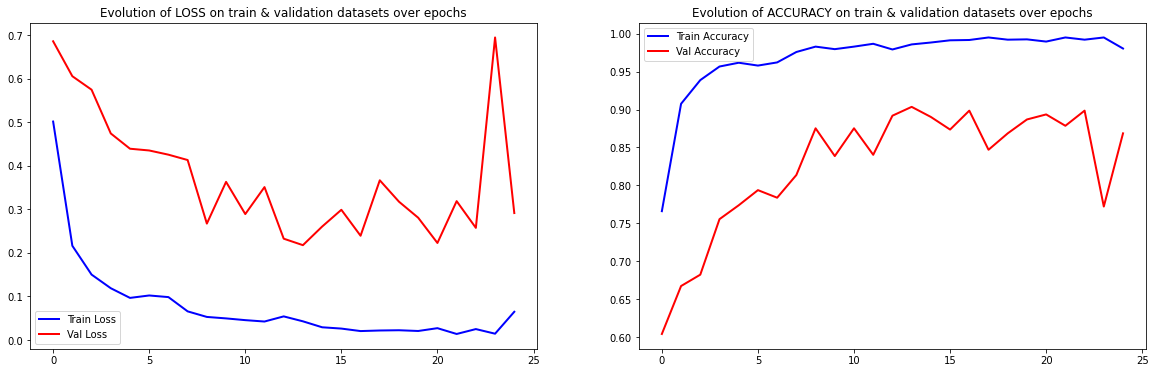

In [77]:
# Check how loss & mae went down
epoch_loss = history.history['loss']
epoch_val_loss = history.history['val_loss']
epoch_acc = history.history['accuracy']
epoch_val_acc = history.history['val_accuracy']

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(range(0,len(epoch_loss)), epoch_loss, 'b-', linewidth=2, label='Train Loss')
plt.plot(range(0,len(epoch_val_loss)), epoch_val_loss, 'r-', linewidth=2, label='Val Loss')
plt.title('Evolution of LOSS on train & validation datasets over epochs')
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.plot(range(0,len(epoch_acc)), epoch_acc, 'b-', linewidth=2, label='Train Accuracy')
plt.plot(range(0,len(epoch_val_acc)), epoch_val_acc, 'r-', linewidth=2,label='Val Accuracy')
plt.title('Evolution of ACCURACY on train & validation datasets over epochs')
plt.legend(loc='best')

plt.show()

In [79]:
loss, accuracy = VGG16model_finetuned.evaluate_generator(validation_generator, workers=12)
print("Validation: accuracy = %f  ;  loss = %f " % (accuracy, loss))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Validation: accuracy = 0.868552  ;  loss = 0.291348 


## **Predict test images**

In [81]:
predict = VGG16model_finetuned.predict_generator(test_generator)
threshold = 0.5
Y_test_pred = np.where(predict > 0.5, 1,0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [82]:
test_res = pd.read_csv('./results-test.csv')
Y_test_actual = test_res['label']
Y_test_actual = np.asarray(Y_test_actual)

## **Confusion Matrix and Classification report- VGG16 Model FineTuned**

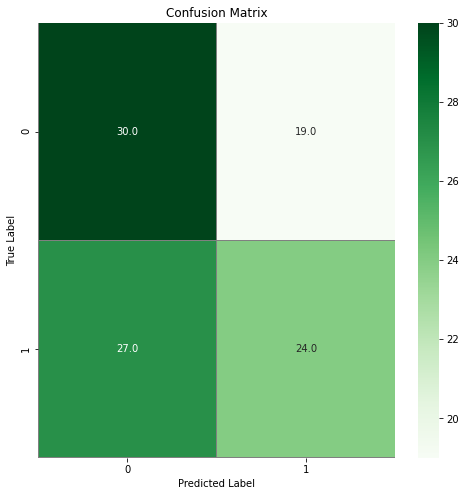

In [83]:
# compute the confusion matrix
Y_test_actual = Y_test_actual.astype('str')
Y_test_pred = Y_test_pred.astype('str')
# y_final = y_final.reshape
# print(type(Y_val), type(y_final), Y_val.shape, y_final.shape, len(Y_val_list[100]), len(Y_final_list))
confusion_mtx = confusion_matrix(Y_test_actual, Y_test_pred) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [85]:
report = classification_report(Y_test_actual, Y_test_pred, target_names=['0','1'])
print(report)

              precision    recall  f1-score   support

           0       0.53      0.61      0.57        49
           1       0.56      0.47      0.51        51

    accuracy                           0.54       100
   macro avg       0.54      0.54      0.54       100
weighted avg       0.54      0.54      0.54       100



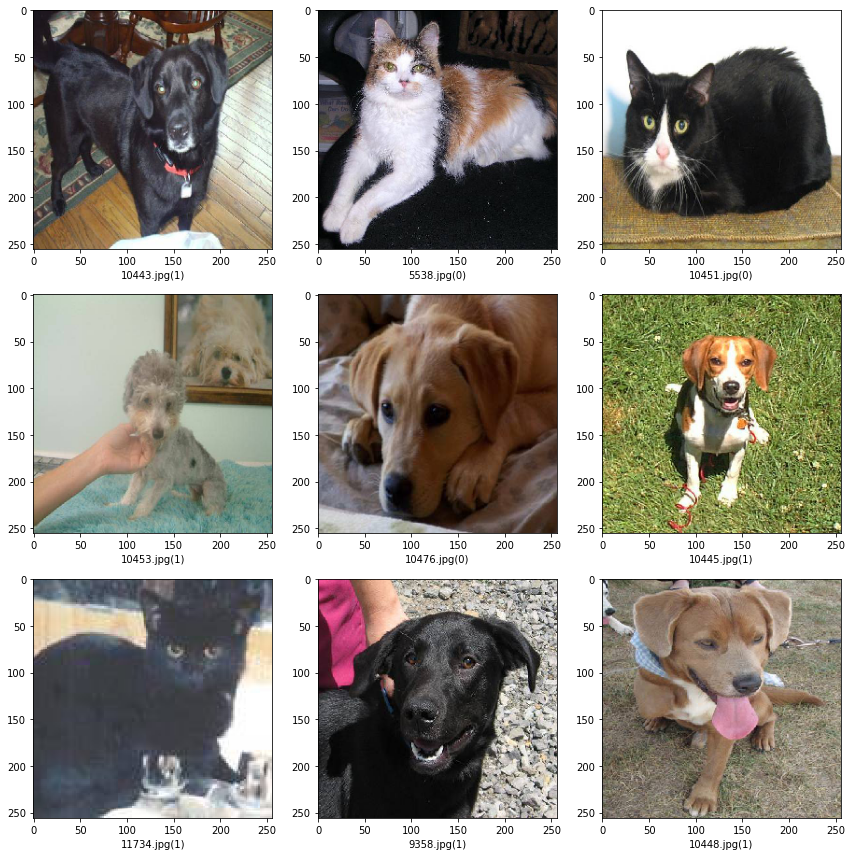

In [87]:
sample_test = test_res.sample(n=9).reset_index()
sample_test.head()
plt.figure(figsize=(12, 12))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['label']
    img = load_img("./test_samp/"+filename, target_size=(256, 256))
    plt.subplot(3, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')')
plt.tight_layout()
plt.show()

# RESNET50

In [ ]:
from keras.applications import ResNet50

input_shape = (image_size, image_size, 3)

pre_trained_model = ResNet50(input_shape=input_shape, include_top=False, weights="imagenet")
# pre_trained_model.summary()
    
last_layer = pre_trained_model.get_layer('conv5_block3_out')
last_output = last_layer.output
    
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 256 hidden units and ReLU activation
x = Dense(256, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

resnet_model = Model(pre_trained_model.input, x)

resnet_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

resnet_model.summary()

NameError: ignored

In [ ]:
early_stopping = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = resnet_model.fit_generator((train_generator), epochs=50, 
                              validation_data = (validation_generator), verbose=1, 
                              callbacks = [reduce_lr, early_stopping])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
19/19 [==============================] - 52s 2s/step - loss: 4.1673 - accuracy: 0.6834 - val_loss: 2090.5337 - val_accuracy: 0.5042
Epoch 2/50
19/19 [==============================] - 44s 2s/step - loss: 0.7511 - accuracy: 0.7994 - val_loss: 0.9616 - val_accuracy: 0.5042
Epoch 3/50
19/19 [==============================] - 44s 2s/step - loss: 0.6532 - accuracy: 0.7857 - val_loss: 88.4612 - val_accuracy: 0.5042
Epoch 4/50
19/19 [==============================] - 44s 2s/step - loss: 0.3920 - accuracy: 0.8343 - val_loss: 0.9343 - val_accuracy: 0.5042
Epoch 5/50
19/19 [==============================] - 43s 2s/step - loss: 0.3105 - accuracy: 0.8531 - val_loss: 0.8653 - val_accuracy: 0.5042
Epoch 6/50
19/19 [==============================] - 43s 2s/step - loss: 0.2427 - accuracy: 0.8910 - val_loss: 0.8279 - val_accuracy: 0.5042
Epoch 7/50
19/19 [==============================] - 43s 2s/step - loss: 0.2381 - accuracy: 0.8925 - val_loss: 0.7435 - val_accuracy: 0.5042
Epoch 8/50
19/19

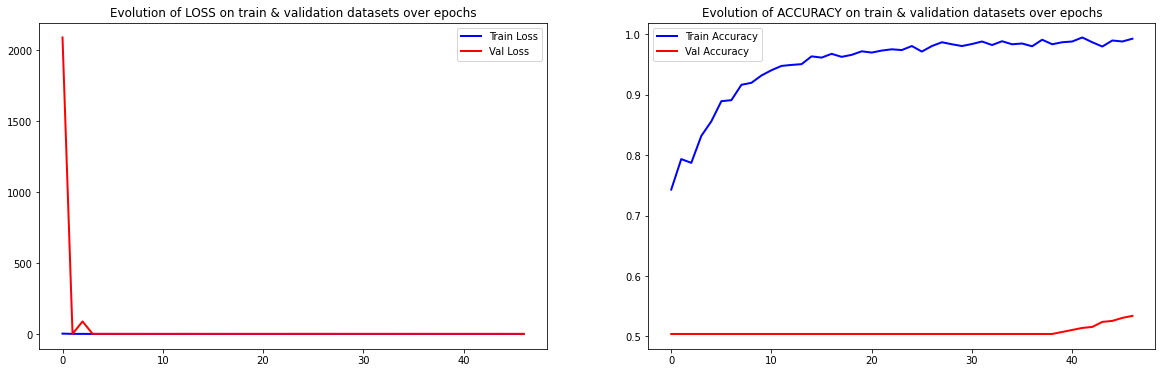

In [ ]:
# Check how loss & mae went down
epoch_loss = history.history['loss']
epoch_val_loss = history.history['val_loss']
epoch_acc = history.history['accuracy']
epoch_val_acc = history.history['val_accuracy']

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(range(0,len(epoch_loss)), epoch_loss, 'b-', linewidth=2, label='Train Loss')
plt.plot(range(0,len(epoch_val_loss)), epoch_val_loss, 'r-', linewidth=2, label='Val Loss')
plt.title('Evolution of LOSS on train & validation datasets over epochs')
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.plot(range(0,len(epoch_acc)), epoch_acc, 'b-', linewidth=2, label='Train Accuracy')
plt.plot(range(0,len(epoch_val_acc)), epoch_val_acc, 'r-', linewidth=2,label='Val Accuracy')
plt.title('Evolution of ACCURACY on train & validation datasets over epochs')
plt.legend(loc='best')

plt.show()

In [ ]:
loss, accuracy = model.evaluate_generator(validation_generator, workers=12)
print("Validation: accuracy = %f  ;  loss = %f " % (accuracy, loss))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Validation: accuracy = 0.504160  ;  loss = 32.764362 


In [ ]:
predict = model.predict_generator(test_generator)
threshold = 0.5
Y_test_pred = np.where(predict > 0.5, 1,0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
test_res = pd.read_csv('./results-test.csv')
Y_test_actual = test_res['label']
Y_test_actual = np.asarray(Y_test_actual)

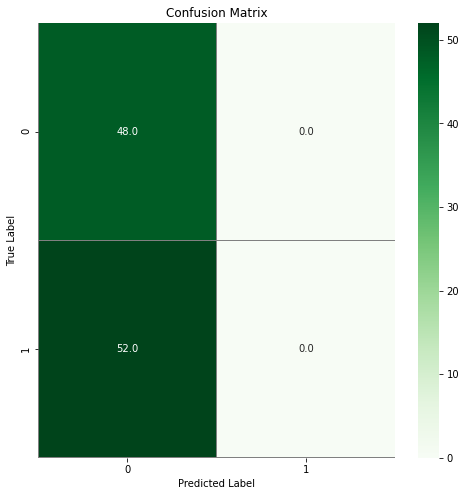

In [ ]:
# compute the confusion matrix
Y_test_actual = Y_test_actual.astype('str')
Y_test_pred = Y_test_pred.astype('str')
# y_final = y_final.reshape
# print(type(Y_val), type(y_final), Y_val.shape, y_final.shape, len(Y_val_list[100]), len(Y_final_list))
confusion_mtx = confusion_matrix(Y_test_actual, Y_test_pred) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [84]:
report = classification_report(Y_test_actual, Y_test_pred, target_names=['0','1'])
print(report)

              precision    recall  f1-score   support

           0       0.53      0.61      0.57        49
           1       0.56      0.47      0.51        51

    accuracy                           0.54       100
   macro avg       0.54      0.54      0.54       100
weighted avg       0.54      0.54      0.54       100



# RESNET50 Fine tuning

In [91]:
from keras.applications import ResNet50

image_size = 224
input_shape = (image_size, image_size, 3)

resnet_pretrained_model = ResNet50(input_shape=input_shape, include_top=False, weights="imagenet")

for layer in resnet_pretrained_model.layers[:150]:
    layer.trainable = False

for layer in resnet_pretrained_model.layers[150:]:
    layer.trainable = True

In [92]:
last_layer = resnet_pretrained_model.get_layer('conv5_block3_out')
last_output = last_layer.output
    
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 256 hidden units and ReLU activation
x = Dense(256, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

resnet_model_fine_tuned = Model(resnet_pretrained_model.input, x)

resnet_model_fine_tuned.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

resnet_model_fine_tuned.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [93]:
history = resnet_model_fine_tuned.fit_generator((train_generator), epochs=25, 
                              validation_data = (validation_generator), verbose=1,
                              callbacks = [early_stopping])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
38/38 [==============================] - 43s 999ms/step - loss: 2.4979 - accuracy: 0.5723 - val_loss: 1.0260 - val_accuracy: 0.4809
Epoch 2/25
38/38 [==============================] - 37s 967ms/step - loss: 0.9749 - accuracy: 0.6615 - val_loss: 1.1463 - val_accuracy: 0.4759
Epoch 3/25
38/38 [==============================] - 36s 952ms/step - loss: 0.6284 - accuracy: 0.6833 - val_loss: 1.1940 - val_accuracy: 0.4742
Epoch 4/25
38/38 [==============================] - 36s 959ms/step - loss: 0.5720 - accuracy: 0.7207 - val_loss: 1.0473 - val_accuracy: 0.4742
Epoch 5/25
38/38 [==============================] - 36s 952ms/step - loss: 0.5707 - accuracy: 0.7066 - val_loss: 1.6637 - val_accuracy: 0.4742
Epoch 6/25
38/38 [==============================] - 37s 959ms/step - loss: 0.5370 - accuracy: 0.7204 - val_loss: 1.3459 - val_accuracy: 0.4759
Epoch 7/25
38/38 [==============================] - 36s 955ms/step - loss: 0.5291 - accuracy: 0.7306 - val_loss: 1.0336 - val_accuracy: 0.4775

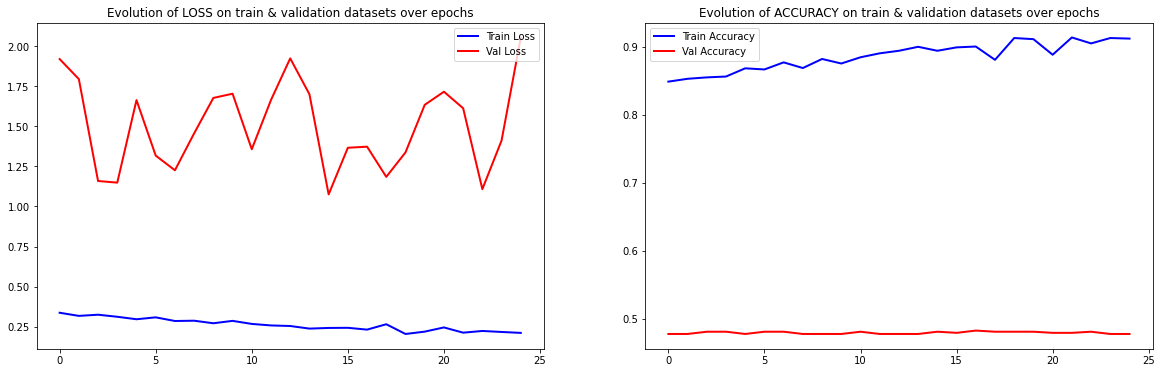

In [42]:
# Check how loss & mae went down
epoch_loss = history.history['loss']
epoch_val_loss = history.history['val_loss']
epoch_acc = history.history['accuracy']
epoch_val_acc = history.history['val_accuracy']

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(range(0,len(epoch_loss)), epoch_loss, 'b-', linewidth=2, label='Train Loss')
plt.plot(range(0,len(epoch_val_loss)), epoch_val_loss, 'r-', linewidth=2, label='Val Loss')
plt.title('Evolution of LOSS on train & validation datasets over epochs')
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.plot(range(0,len(epoch_acc)), epoch_acc, 'b-', linewidth=2, label='Train Accuracy')
plt.plot(range(0,len(epoch_val_acc)), epoch_val_acc, 'r-', linewidth=2,label='Val Accuracy')
plt.title('Evolution of ACCURACY on train & validation datasets over epochs')
plt.legend(loc='best')

plt.show()

In [43]:
loss, accuracy = resnet_model_fine_tuned.evaluate_generator(validation_generator, workers=12)
print("Validation: accuracy = %f  ;  loss = %f " % (accuracy, loss))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Validation: accuracy = 0.477537  ;  loss = 2.053684 


In [44]:
predict = resnet_model_fine_tuned.predict_generator(test_generator)
threshold = 0.5
Y_test_pred = np.where(predict > 0.5, 1,0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [45]:
test_res = pd.read_csv('./results-test.csv')
Y_test_actual = test_res['label']
Y_test_actual = np.asarray(Y_test_actual)

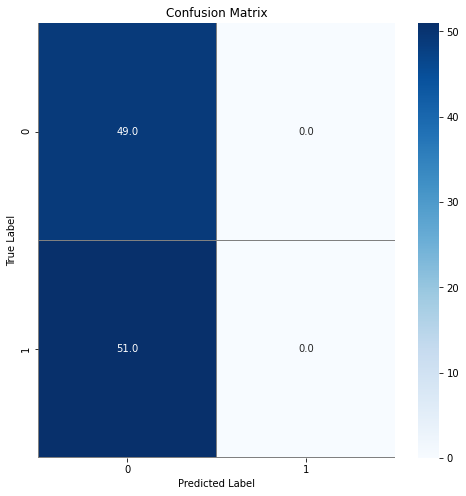

In [46]:
# compute the confusion matrix
Y_test_actual = Y_test_actual.astype('str')
Y_test_pred = Y_test_pred.astype('str')
# y_final = y_final.reshape
# print(type(Y_val), type(y_final), Y_val.shape, y_final.shape, len(Y_val_list[100]), len(Y_final_list))
confusion_mtx = confusion_matrix(Y_test_actual, Y_test_pred) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()